In [1]:
!pip install --quiet numpy pandas matplotlib scikit-learn

scikit-learn: A machine learning library that provides tools for various tasks like classification, regression, clustering, and more.
quiet doesn't show output for this code.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

np.set_printoptions(precision=4, suppress=True)
%matplotlib inline

`np.set_printoptions(precision=4, suppress=True):`Configures NumPy's print options to display floating-point numbers with a precision of 4 decimal places and suppress the use of scientific notation for small numbers.

`%matplotlib inline:` This is a magic command that ensures that Matplotlib plots are displayed directly within the notebook output.



---



**The following code is me learning the intuition first**

By printing out results of operations like A.T, np.linalg.inv(A), or vector projections, i demonstrate what happens numerically.

Example: If you compute a transpose, the shape change matters. If you compute a rank, it helps you understand if the matrix is invertible.

Even though I don't reuse these specific numbers later, the concepts are what I need when coding linear regression from scratch.

Linear regression relies on matrix multiplication (X.T @ X), inverse (np.linalg.inv), and
projections (regression is essentially projecting onto the column space of X).

By practicing them separately, I will recognize them when they appear in the regression formula:

𝜃
=
(
𝑋
𝑇
𝑋
)
−
1
𝑋
𝑇
𝑦
θ=(X
T
X)
−1
X
T
y

In [3]:
# vectors
u = np.array([3., 4.])
v = np.array([1., -2.])
#making two random arrays

# L2 norm
norm_u = np.linalg.norm(u)
#This calculates the L2 norm (Euclidean norm) of vector u. It's the length of the vector from the origin to the point represented by the vector.

# L1 norm
l1_u = np.abs(u).sum()
#This calculates the L1 norm of vector u. It's the sum of the absolute values of the vector's elements.


'''L1 Norm (Manhattan Distance): This is the sum of the absolute values of the
vector's components. It's like walking in a city grid, where you can only move
along the blocks (horizontally or vertically).
The L1 norm is the total distance traveled along these blocks from the origin to
the point represented by the vector. It is less sensitive to outliers than the L2 norm.

L2 Norm (Euclidean Distance): This is the square root of the sum of the squared
values of the vector's components. It's the straight-line distance from the
origin to the point represented by the vector, like measuring the distance
"as the crow flies." The L2 norm is more sensitive to large values and outliers.'''

# dot product & cosine of angle
u_dot_v = u @ v
#calculates dot product of vectors u and v using @ operator (matrix multiplication for NumPy arrays)

cos_theta = (u_dot_v) / (np.linalg.norm(u) * np.linalg.norm(v))
#np.linalg.norm in NumPy calculates the norm of a vector or matrix. By default, it computes the L2 norm (Euclidean norm).

print(f"||u||2: {norm_u}")
print()
print(f"||u||1: {l1_u}")
print()
print(f"u·v: {u_dot_v}")
print()
print(f"cos(theta): {cos_theta}")

||u||2: 5.0

||u||1: 7.0

u·v: -5.0

cos(theta): -0.4472135954999579


We calculated Cosine and Dot Product in the above code because the cosine of the angle between two vectors is directly proportional to their dot product (when the norms are fixed). And we have the dot product is fundamental to calculating projections and understanding orthogonality, which are key concepts in the closed-form solution of linear regression and the minimization of the error.



---



Making Data and Practicing Matrix Operations:

In [4]:
A = np.array([[1., 2., 3.],
              [0., 1., 4.]])      # shape (2,3)
#Creating NumPy arrays / matrices
B = np.array([[1., 2.],
              [3., 4.],
              [5., 6.]])          # shape (3,2)
#Creating another NumPy arrays / matrices

print('A shape', A.shape, 'B shape', B.shape)
C = A @ B                          # (2x3) @ (3x2) -> (2x2) multiplying matrices
print('C = A@B ->', C)
print('A^T shape', A.T.shape) #transposing a matrix

A shape (2, 3) B shape (3, 2)
C = A@B -> [[22. 28.]
 [23. 28.]]
A^T shape (3, 2)


In [5]:
M = np.array([[2., 0.],
              [0., 2.]])
rank_M = np.linalg.matrix_rank(M)
#The rank of a matrix is the maximum number of linearly independent row or column vectors. A full-rank square matrix is invertible.


Minv = np.linalg.inv(M)
#calculating the inverse of matrix M

# singular (non‑invertible) example
S = np.array([[1., 2.],
              [2., 4.]])
rank_S = np.linalg.matrix_rank(S)
Spinv = np.linalg.pinv(S)          # pseudo‑inverse always defined
#This calculates the Moore-Penrose pseudo-inverse of matrix S.
#The pseudo-inverse is a generalization of the matrix inverse and is defined
#even for singular or non-square matrices.

#projection of w onto a (both 2D for demo)
a = np.array([2., 1.])
w = np.array([1., 3.])
proj_w_on_a = (w @ a) / (a @ a) * a

print({'Rank of Matrix M / rank(M)': rank_M, 'rank(S)': rank_S})
print('Inverse of Matrix M/ M^{-1} =\n', Minv)
print('Pseudo Inverse of S / S^{+} (pinv) =\n', Spinv)
print('Projecting W on A/ proj_a(w) =', proj_w_on_a)

{'Rank of Matrix M / rank(M)': np.int64(2), 'rank(S)': np.int64(1)}
Inverse of Matrix M/ M^{-1} =
 [[0.5 0. ]
 [0.  0.5]]
Pseudo Inverse of S / S^{+} (pinv) =
 [[0.04 0.08]
 [0.08 0.16]]
Projecting W on A/ proj_a(w) = [2. 1.]




---



**Task: Predict a numeric target from features using (1) closed‑form solution (normal equation) and (2) gradient descent.**

Option A — Synthetic linear data (not going to use this, just practicing how to):

In [6]:
rng = np.random.default_rng(42)
#makes sure that the random numbers generated are the same every time for reproducible results
m, n = 200, 3
#m represents the number of data samples (200)
#n represents the number of features (3).
X_true = rng.normal(size=(m, n))
#X_true is made up of m and n with random numbers
true_w = np.array([4.0, -2.0, 1.5]) #assigning true weights to the features of the linear regression model
true_b = 3.0 #This line defines a scalar true_b representing the true bias term for the linear model.
noise = rng.normal(scale=0.7, size=m)
#This line generates a NumPy array noise with size m containing random numbers
#drawn from a normal distribution with a standard deviation of 0.7 (and mean 0).
# This represents random noise that will be added to the true linear relationship
#to make the data more realistic.
y_true = X_true @ true_w + true_b + noise
'''This line calculates the true target variable y_true.
It follows the linear model equation: y = X * w + b + noise.
The @ operator performs matrix multiplication of X_true and true_w.'''

X = X_true.copy()
y = y_true.copy()

Option B — Real data (California Housing, continuous target, will use this):

In [7]:
from sklearn.datasets import fetch_california_housing
#This line imports the fetch_california_housing function from scikit-learn's datasets module.
cal = fetch_california_housing(as_frame=True)
#The as_frame=True argument ensures that the data is returned as a pandas DataFrame. The loaded dataset is stored in the variable cal.
X = cal.data
y = cal.target

Split & scale (good for gradient descent):

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

# add bias term as a column of ones
def add_bias(X):
    return np.hstack([np.ones((X.shape[0], 1)), X])
#It adds a column of ones to the left of the array.
#This column represents the bias term (or intercept) in a linear model, allowing the model to have a non-zero intercept.

Xb_train = add_bias(X_train_s)
Xb_test  = add_bias(X_test_s)
print('Train shape with bias:', Xb_train.shape)

Train shape with bias: (16512, 9)




---



The following is the first method of Linear Regrssion. It's called **Closed-Form Solution (Normal Equation)**

This method directly calculates the optimal weights using a mathematical formula involving matrix operations (specifically, the pseudo-inverse of the feature matrix).

We have then made the predictions, calculated the r2 score and the Mean Square Error.


The least‑squares solution is θ = (XᵀX)⁺ Xᵀ y where ⁺ is the pseudo‑inverse.

Why pinv? (XᵀX) may be ill‑conditioned or singular. pinv (SVD‑based) is more numerically stable than inv.

In [9]:
# closed‑form using pseudo‑inverse (stable)
theta_closed = np.linalg.pinv(Xb_train) @ y_train
'''
- calculates the Moore-Penrose pseudo-inverse of the training data matrix with
the added bias term (Xb_train).
The pseudo-inverse is used here because it works even if the matrix is not invertible (e.g., if features are highly correlated).

- performs matrix multiplication of the pseudo-inverse of Xb_train and the training target variable y_train.
- This calculation directly yields the optimal weight vector (theta_closed) that minimizes the mean squared error
 for the training data.'''

# predictions
pred_cf = Xb_test @ theta_closed
'''This line uses the calculated theta_closed to make predictions on the testing
 data (Xb_test). It performs matrix multiplication of the test features (with bias)
  and the learned weights.'''
mse_cf = mean_squared_error(y_test, pred_cf)
rmse_cf = np.sqrt(mse_cf)
r2_cf = r2_score(y_test, pred_cf)
print('Closed‑form -> RMSE:', rmse_cf, ' R^2:', r2_cf)

Closed‑form -> RMSE: 0.745581383012776  R^2: 0.5757877060324512


We minimize J(θ) = (1/2m) ||Xθ - y||². Gradient: ∇J = (1/m) Xᵀ(Xθ - y).

The following code defines the `gradient_descent` function and tests different learning rates. The results are printed but not used in the final model training.

In [10]:
def gradient_descent(Xb, y, lr=0.1, epochs=500, verbose=False):
    m, n = Xb.shape
    theta = np.zeros(n)
    history = []
    for t in range(epochs):
        pred = Xb @ theta
        error = pred - y
        grad = (Xb.T @ error) / m
        theta -= lr * grad
        loss = (error @ error) / (2*m)
        history.append(loss)
        if verbose and (t % max(1,epochs//10) == 0):
            print(f"epoch {t:4d}  loss={loss:.6f}")
    return theta, np.array(history)

# try a few learning rates quickly
for lr in [1.0, 0.3, 0.1, 0.03, 0.01]:
    th_gd, hist = gradient_descent(Xb_train, y_train, lr=lr, epochs=400)
    if np.isfinite(hist[-1]):
        print(lr, 'final loss:', float(hist[-1]))

1.0 final loss: 396660.0658350583
0.3 final loss: 0.25896663518018836
0.1 final loss: 0.2591991948921719
0.03 final loss: 0.2699563788805311
0.01 final loss: 0.2977767448591719


Pick a stable learning rate (e.g., 0.1 or 0.03). Then train & plot:

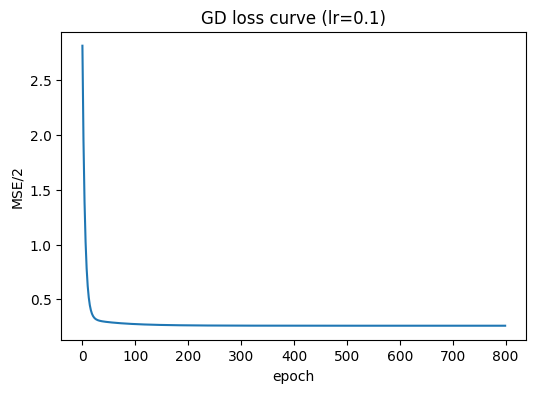

Gradient Descent -> RMSE: 0.7457360789861844  R^2: 0.5756116535097078


In [11]:
best_lr = 0.1 #setting the learning rate to be 0.1
th_gd, hist = gradient_descent(Xb_train, y_train, lr=best_lr, epochs=800) #training the model using gradient descent

plt.figure(figsize=(6,4))
plt.plot(hist)
plt.title(f'GD loss curve (lr={best_lr})')
plt.xlabel('epoch')
plt.ylabel('MSE/2')
plt.show()

pred_gd = Xb_test @ th_gd
rmse_gd = np.sqrt(mean_squared_error(y_test, pred_gd))
r2_gd = r2_score(y_test, pred_gd)
print('Gradient Descent -> RMSE:', rmse_gd, ' R^2:', r2_gd)

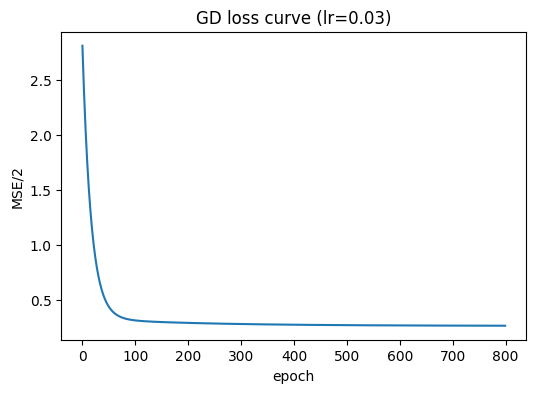

Gradient Descent -> RMSE: 0.7445281622189677  R^2: 0.5769853583563822


In [12]:
best_lr = 0.03 #setting the learning rate to be 0.1
th_gd, hist = gradient_descent(Xb_train, y_train, lr=best_lr, epochs=800) #training the model using gradient descent

plt.figure(figsize=(6,4))
plt.plot(hist)
plt.title(f'GD loss curve (lr={best_lr})')
plt.xlabel('epoch')
plt.ylabel('MSE/2')
plt.show()

pred_gd = Xb_test @ th_gd
rmse_gd = np.sqrt(mean_squared_error(y_test, pred_gd))
r2_gd = r2_score(y_test, pred_gd)
print('Gradient Descent -> RMSE:', rmse_gd, ' R^2:', r2_gd)

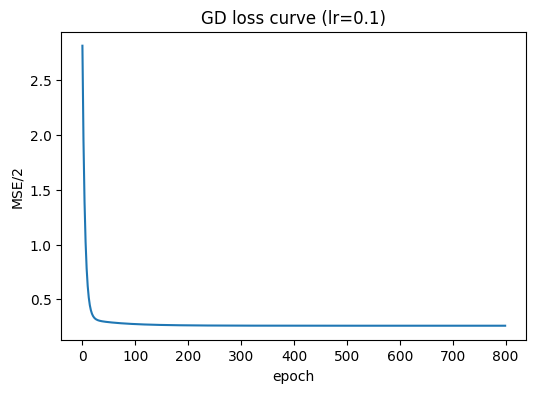

Gradient Descent -> RMSE: 0.7457360789861844  R^2: 0.5756116535097078


In [13]:
best_lr = 0.1 #setting the learning rate to be 0.1
th_gd, hist = gradient_descent(Xb_train, y_train, lr=best_lr, epochs=800) #training the model using gradient descent

plt.figure(figsize=(6,4))
plt.plot(hist)
plt.title(f'GD loss curve (lr={best_lr})')
plt.xlabel('epoch')
plt.ylabel('MSE/2')
plt.show()

pred_gd = Xb_test @ th_gd
rmse_gd = np.sqrt(mean_squared_error(y_test, pred_gd))
r2_gd = r2_score(y_test, pred_gd)
print('Gradient Descent -> RMSE:', rmse_gd, ' R^2:', r2_gd)

You should see all three approaches within a similar ballpark (GD may be slightly worse if under‑trained or poorly tuned).

The following code trains a Linear Regression model using scikit-learn, makes predictions, evaluates the model, and prints a dictionary comparing the RMSE and R2

In [14]:
sk_model = LinearRegression(fit_intercept=True) #training linear regression model
sk_model.fit(X_train_s, y_train)
pred_sk = sk_model.predict(X_test_s)
rmse_sk = np.sqrt(mean_squared_error(y_test, pred_sk))
r2_sk = r2_score(y_test, pred_sk)

print({
    'Closed‑form_RMSE': rmse_cf,
    'Closed‑form_R2': r2_cf,
    'GD_RMSE': rmse_gd,
    'GD_R2': r2_gd,
    'sklearn_RMSE': rmse_sk,
    'sklearn_R2': r2_sk
})

{'Closed‑form_RMSE': np.float64(0.745581383012776), 'Closed‑form_R2': 0.5757877060324512, 'GD_RMSE': np.float64(0.7457360789861844), 'GD_R2': 0.5756116535097078, 'sklearn_RMSE': np.float64(0.7455813830127763), 'sklearn_R2': 0.575787706032451}


Ridge adds L2 penalty λ||w||² (not including bias). Closed‑form: θ = (XᵀX + λI)⁻¹ Xᵀy.

Demonstrates Ridge Regression using a closed-form solution, makes predictions, and prints the RMSE.

In [15]:
lam = 1.0
I = np.eye(Xb_train.shape[1])
I[0,0] = 0.0  # do not regularize the bias
theta_ridge = np.linalg.inv(Xb_train.T @ Xb_train + lam*I) @ (Xb_train.T @ y_train)

pred_rg = Xb_test @ theta_ridge
print('Ridge RMSE:', np.sqrt(mean_squared_error(y_test, pred_rg)))

Ridge RMSE: 0.7455567442814778


In [16]:
# Calculate R2 for Ridge Regression
r2_rg = r2_score(y_test, pred_rg)

# Create a dictionary to hold the metrics
comparison_metrics = {
    'Method': ['Closed-form', 'Gradient Descent', 'Scikit-learn', 'Ridge Regression'],
    'RMSE': [rmse_cf, rmse_gd, rmse_sk, np.sqrt(mean_squared_error(y_test, pred_rg))],
    'R^2': [r2_cf, r2_gd, r2_sk, r2_rg]
}

# Create a pandas DataFrame from the dictionary
comparison_df = pd.DataFrame(comparison_metrics)

# Display the table
display(comparison_df)

,Method,RMSE,R^2
0,Closed-form,0.745581,0.575788
1,Gradient Descent,0.745736,0.575612
2,Scikit-learn,0.745581,0.575788
3,Ridge Regression,0.745557,0.575816


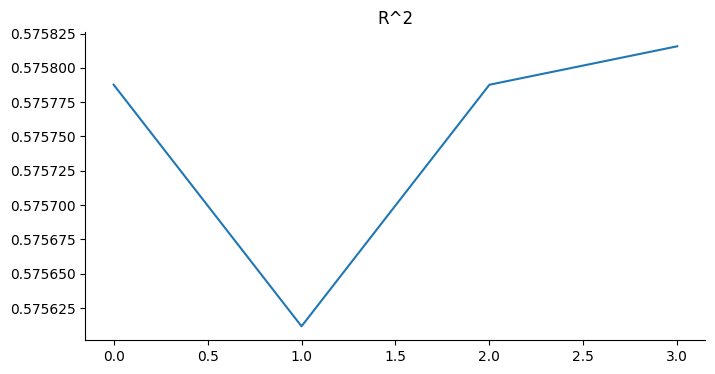

In [18]:
# @title R^2

from matplotlib import pyplot as plt
comparison_df['R^2'].plot(kind='line', figsize=(8, 4), title='R^2')
plt.gca().spines[['top', 'right']].set_visible(False)

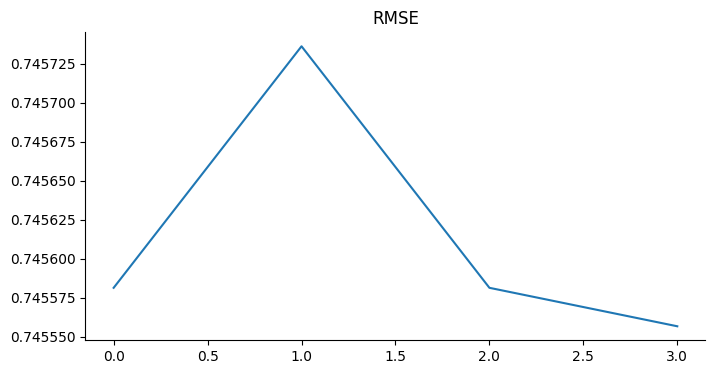

In [17]:
# @title RMSE

from matplotlib import pyplot as plt
comparison_df['RMSE'].plot(kind='line', figsize=(8, 4), title='RMSE')
plt.gca().spines[['top', 'right']].set_visible(False)

Since all methods converge to the same solution, the choice isn’t about “which gives better accuracy,” but about:

Efficiency:

Closed-form works well for small → medium datasets, but becomes computationally expensive for very large datasets.

Gradient Descent scales better for large datasets.

Flexibility:

Ridge Regression (and Lasso) help prevent overfitting if you have lots of correlated features or noise.

Convenience:

Scikit-learn is easiest to use, debug, and extend.